# Wine Quality 
#### Nombre del dataset :  [Wine Quality del UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality)


### Introducción

Este proyecto se centra en el análisis exploratorio de datos (EDA) de un conjunto de datos de calidad del vino, que contiene información sobre vinos rojos y blancos.

### Origen de los Datos

Los datos utilizados en este análisis provienen del Repositorio de Aprendizaje Automático de la UCI (Universidad de California, Irvine). Fueron recopilados por P. Cortez, A. Cerdeira, F. Almeida, T. Matos y J. Reis en la Universidade de Minho, Portugal. Estos investigadores recopilaron información sobre diferentes propiedades químicas de vinos y la calidad percibida por catadores expertos.

###  Objetivo del Análisis

El objetivo principal de este análisis es comprender en profundidad el conjunto de datos y extraer información valiosa que pueda ser útil para desarrollar modelos de aprendizaje automático para predecir la calidad del vino en función de sus propiedades químicas. Además de este objetivo central, existen otros objetivos más específicos, que incluyen:

1. Identificar patrones y relaciones entre las características químicas y la calidad del vino.
2. Evaluar la distribución de la calidad del vino.
3. Realizar un análisis exploratorio para revelar insights y tendencias interesantes.

####  Variables en el Conjunto de Datos

El conjunto de datos se divide en dos archivos CSV: uno para vinos rojos y otro para vinos blancos. Cada archivo contiene las siguientes variables con sus respectivas unidades:

####  Variables de Características Químicas (Entradas):

1. `fixed acidity` (g/dm³): Acidez fija.
2. `volatile acidity` (g/dm³): Acidez volátil.
3. `citric acid` (g/dm³): Ácido cítrico.
4. `residual sugar` (g/dm³): Azúcar residual.
5. `chlorides` (g/dm³): Cloruros.
6. `free sulfur dioxide` (mg/dm³): Dióxido de azufre libre.
7. `total sulfur dioxide` (mg/dm³): Dióxido de azufre total.
8. `density` (g/cm³): Densidad.
9. `pH`: pH.
10. `sulphates` (g/dm³): Sulfatos.
11. `alcohol` (% vol): Contenido de alcohol.

### Variable de Calidad (Objetivo):

12. `quality`: Calidad del vino (puntuación de 0 a 10, donde 0 es de muy mala calidad y 10 es excelente de calidad).

### Análisis Exploratorio de Datos - Conjunto de Datos de Calidad del Vino

En las secciones siguientes de este notebook, realizaremos un análisis exhaustivo de estas variables y exploraremos relaciones, tendencias y patrones. Además, se llevarán a cabo visualizaciones gráficas para facilitar la comprensión de los datos.

In [26]:
# Importación de librerías para tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Importación de librerías para gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from tabulate import tabulate

# Importación de librerías para estadística descriptiva
# ==============================================================================
from scipy.stats import shapiro, kstest, anderson
from scipy.stats import describe

# Importación de librerías para métricas y evaluación
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importación de librerías para modelado
# ==============================================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR

In [27]:
 import pandas as pd

# Nombres de las columnas (variables)
column_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
                "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]

# Datos de vinos rojos 
red_wine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";", names=column_names, header=0)

# Datos de vinos blancos 
white_wine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";", names=column_names, header=0)


### Vinos Blancos (White Wine)
1. **Aspectos Generales**: 

In [3]:
X = white_wine_df.drop("quality", axis=1)  
y = white_wine_df["quality"] 

In [4]:
#Visualización del dataframe
white_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
#Forma del dataframe
white_wine_df.shape

(4898, 12)

In [6]:
print(white_wine_df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [7]:
# Aspectos básicos del DataFrame
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
#Examinando datos perdidos 
white_wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

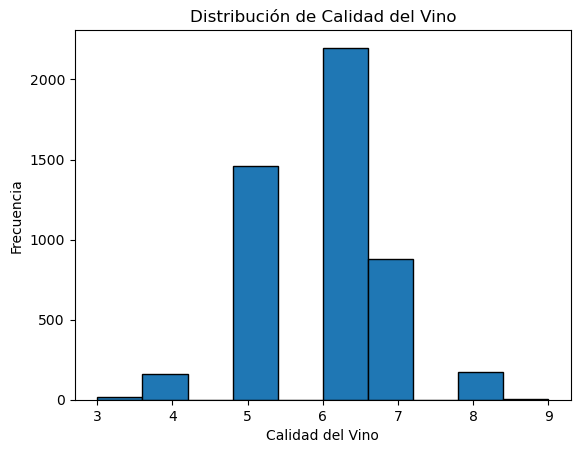

In [9]:
plt.hist(y, bins=10, edgecolor='k')  
plt.xlabel('Calidad del Vino')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calidad del Vino')
plt.show()

2. **Estadistica básica: Normalidad del conjuto de datos**: 

 2.1 _Histogramas_: Una forma visual preliminar de verificar la normalidad de tus datos es crear un histograma. Si la distribución se asemeja a una campana simétrica, en este caso más probable que siga una distribución normal, por la forma de campana. De igual manera vemos que tiene leves asimetrias, por lo cual vamos utilizar otros metodos para comprobar su distribución.

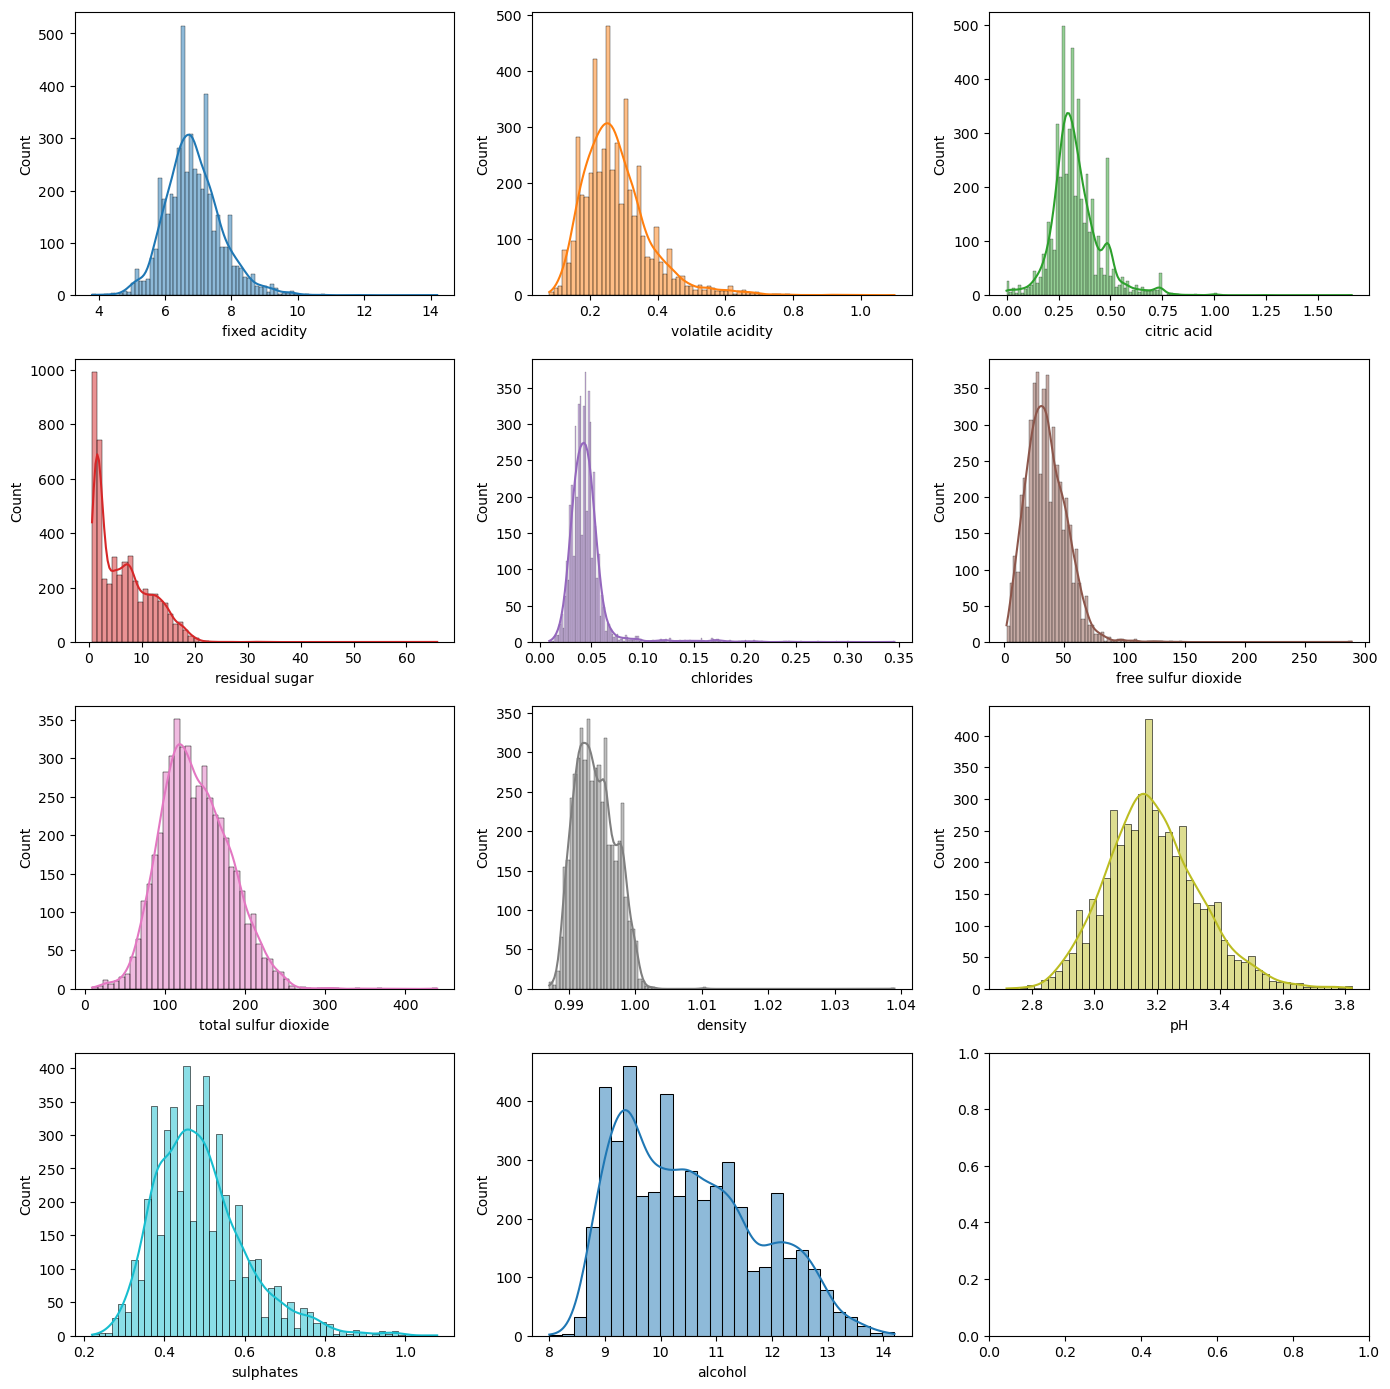

In [10]:
#Construcción de histogramas
import seaborn as sns

fig, axes = plt.subplots(4, 3, figsize=(14, 14))

for i, column in enumerate(column_names[:-1]):
    row = i // 3  # Índice de fila
    col = i % 3   # Índice de columna
    sns.histplot(white_wine_df[column], kde=True, ax=axes[row, col], color= (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"])

plt.tight_layout() 
plt.show()


 2.2 _Pruebas de distribución normal_: 
 
Para evaluar si el conjunto de datos sigue una distribución normal, utilizaremos la prueba de Anderson-Darling. Esta prueba es más poderosa para detectar desviaciones de la normalidad en las colas largas de la distribución, como se hace evidente en los histogramas. Esto significa que puede identificar valores atípicos en las colas más eficazmente que la Prueba de Shapiro-Wilk. Además, la Prueba de Shapiro-Wilk funciona bien con tamaños de muestra generalmente menores a 2,000 observaciones, mientras que para el conjunto de datos del vino blanco, tenemos 4,898 entradas.

Hipótesis nula (H0): Los datos siguen una distribución normal o gaussiana.

Hipótesis alternativa (Ha): Los datos no siguen una distribución normal

In [11]:
# DataFrame para almacenar los resultados 
results = pd.DataFrame(columns=["Feature", "Anderson-Darling p-value", "Anderson-Darling Normality", "Skewness", "Skewness Interpretation"])

# nivel de significancia 
alpha = 0.05

for feature in column_names:
    data = white_wine_df[feature]
    
    # Prueba de Anderson-Darling
    anderson_result = anderson(data)
    ad_p = anderson_result.critical_values[2]  
    if ad_p > alpha:
        ad_normality = "Se acepta la H0"
    else:
        ad_normality = "Se rechaza la H0"
    
    # Estadísticas descriptivas
    stats = describe(data)
    
    #  estadísticas de sesgo
    skewness = stats.skewness
    skewness_interpretation = "Sesgo a la izquierda" if skewness < 0 else "Sesgo a la derecha" if skewness > 0 else "Sin sesgo"
    
    # Agregar los resultados al DataFrame
    result_df = pd.DataFrame({
        "Feature": [feature],
        "Anderson-Darling p-value": [ad_p],
        "Anderson-Darling Normality": [ad_normality],
        "Skewness": [skewness],
        "Skewness Interpretation": [skewness_interpretation] 
    })
    results = pd.concat([results, result_df], ignore_index=True)
    
results

,Feature,Anderson-Darling p-value,Anderson-Darling Normality,Skewness,Skewness Interpretation
0,fixed acidity,0.786,Se acepta la H0,0.647553,Sesgo a la derecha
1,volatile acidity,0.786,Se acepta la H0,1.576497,Sesgo a la derecha
2,citric acid,0.786,Se acepta la H0,1.281528,Sesgo a la derecha
3,residual sugar,0.786,Se acepta la H0,1.076764,Sesgo a la derecha
4,chlorides,0.786,Se acepta la H0,5.021792,Sesgo a la derecha
5,free sulfur dioxide,0.786,Se acepta la H0,1.406314,Sesgo a la derecha
6,total sulfur dioxide,0.786,Se acepta la H0,0.390590,Sesgo a la derecha
7,density,0.786,Se acepta la H0,0.977474,Sesgo a la derecha
8,pH,0.786,Se acepta la H0,0.457642,Sesgo a la derecha
9,sulphates,0.786,Se acepta la H0,0.976894,Sesgo a la derecha


2. 3 _Matriz de correlación_: 

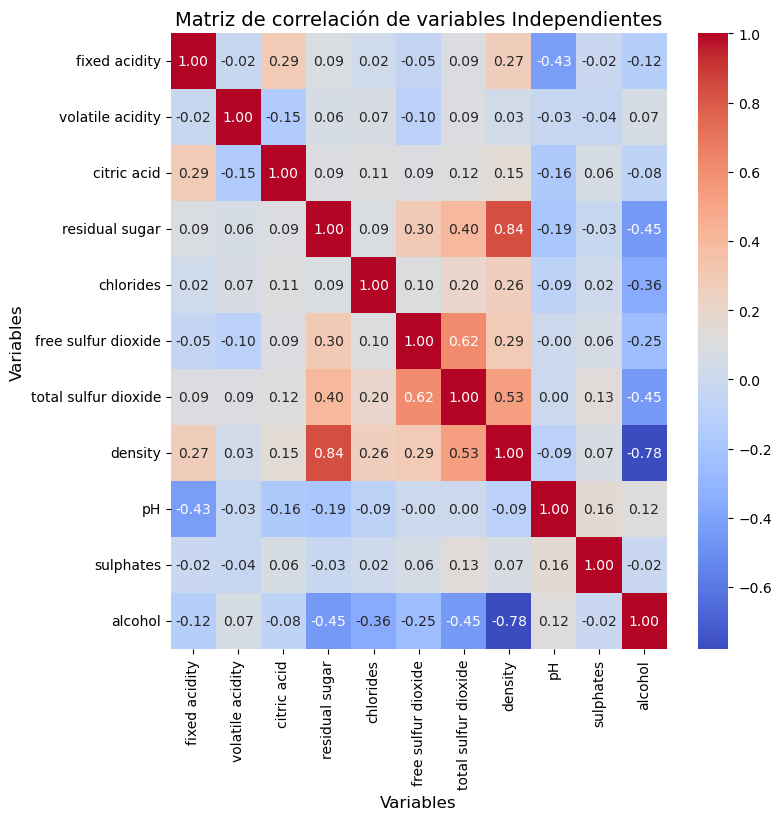

In [12]:
import seaborn as sns

# matriz de correlación de variables independientes
x_correlation_matrix = X.corr()


plt.figure(figsize=(8, 8))
sns.heatmap(x_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación de variables Independientes", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# los ejes x e y
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)


plt.show()

In [13]:
classification = []

for attribute in x_correlation_matrix.columns:
    for other_attribute, correlation in x_correlation_matrix[attribute].items():
        if attribute != other_attribute:
            if abs(correlation)> 0.75:
                classification.append((attribute, other_attribute, correlation, "Alta correlación"))
            elif abs(correlation) >0.3:
                classification.append((attribute, other_attribute, correlation, "Moderada correlación"))

headers = ["Atributo 1", "Atributo 2", "Correlación", "Clasificación"]
table = tabulate(classification, headers=headers, tablefmt="fancy_grid")
print(table)

╒══════════════════════╤══════════════════════╤═══════════════╤══════════════════════╕
│ Atributo 1           │ Atributo 2           │   Correlación │ Clasificación        │
╞══════════════════════╪══════════════════════╪═══════════════╪══════════════════════╡
│ fixed acidity        │ pH                   │     -0.425858 │ Moderada correlación │
├──────────────────────┼──────────────────────┼───────────────┼──────────────────────┤
│ residual sugar       │ total sulfur dioxide │      0.401439 │ Moderada correlación │
├──────────────────────┼──────────────────────┼───────────────┼──────────────────────┤
│ residual sugar       │ density              │      0.838966 │ Alta correlación     │
├──────────────────────┼──────────────────────┼───────────────┼──────────────────────┤
│ residual sugar       │ alcohol              │     -0.450631 │ Moderada correlación │
├──────────────────────┼──────────────────────┼───────────────┼──────────────────────┤
│ chlorides            │ alcohol           

**Conclusión** : Se han identificado pares de variables con correlaciones altas. Una forma de abordar la multicolinealidad es eliminar una de las variables de cada par. Por ejemplo, "residual sugar" y "density" con una alta correlación. Sin embargo, antes de eliminar una variable, es importante entender la relevancia de cada variable en el contexto del problema. A veces, las variables correlacionadas pueden aportar información única y ser importantes para el modelo, para lo cual realizaremos un análisis de importancia de características o considera el conocimiento del dominio.

In [14]:
# Datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. 5 _Análisis de importancia de características_: 

In [15]:
# Crea un modelo Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Ajusta el modelo 
clf.fit(X_train, y_train)

# puntuaciones de importancia
importances = clf.feature_importances_

# importancias con los nombres de las características
feature_importance = list(zip(X.columns, importances))

# Ordena por su importancia
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

#características y sus puntuaciones de importancia
for feature, importance in feature_importance:
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: alcohol, Importance: 0.1132
Feature: density, Importance: 0.1064
Feature: volatile acidity, Importance: 0.1020
Feature: free sulfur dioxide, Importance: 0.0946
Feature: total sulfur dioxide, Importance: 0.0914
Feature: residual sugar, Importance: 0.0890
Feature: pH, Importance: 0.0846
Feature: chlorides, Importance: 0.0827
Feature: citric acid, Importance: 0.0808
Feature: sulphates, Importance: 0.0787
Feature: fixed acidity, Importance: 0.0766


**Conclusión**: 
La importancia de las características te indica qué tan influyentes son las características en el proceso de clasificación. Cuanto mayor sea la importancia, más influencia tiene la característica en el modelo de clasificación : 

- **Alcohol** es la característica más importante, con una importancia de aproximadamente 0.1132. Se concluye que alcohol es la característica más influyente en la clasificación.
- **Density** es la segunda característica más importante, con una importancia de aproximadamente 0.1064.
- **Volatile acidity** es la tercera característica más importante, con una importancia de aproximadamente 0.1020.

In [16]:
# Escalar características 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos (excluyendo MultinomialNB)
models = [
    ("Árbol de Decisión", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("K-NN", KNeighborsClassifier())
]

# Entrenar y evaluar modelos
results = {}

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Imprimir resultados
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.2f}")
    
best_model_name = max(results, key=results.get)
print(f"El mejor modelo es: {best_model_name}")


Árbol de Decisión: Accuracy = 0.61
Random Forest: Accuracy = 0.69
SVM: Accuracy = 0.56
K-NN: Accuracy = 0.54
El mejor modelo es: Random Forest


/home/johannadiazaguirre/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


_Conclusión_ : 

- **Modelo: Regresión Logística**

Precisión: 54.34% con una desviación estándar de 1.38%
La Regresión Logística ha obtenido una precisión del 54.34% en la clasificación de la calidad del vino. Esto significa que el modelo acertó en su predicción de la calidad del vino en aproximadamente el 54.34% de los casos. Sin embargo, la desviación estándar del 1.38% indica que el rendimiento del modelo puede variar en alrededor de 1.38%. En otras palabras, el modelo no es muy consistente en sus predicciones y podría no ser el más adecuado para este problema.

- **Modelo: Árbol de Decisión**

Precisión: 57.96% con una desviación estándar de 1.80%
El modelo de Árbol de Decisión ha logrado una precisión del 57.96% en la clasificación de la calidad del vino. Esto representa un rendimiento ligeramente mejor que el de la Regresión Logística. La desviación estándar de 1.80% muestra que el modelo puede tener una variabilidad de aproximadamente 1.80% en su rendimiento, lo que es un poco más consistente en comparación con la Regresión Logística.

- **Modelo: Random Forest**

Precisión: 66.03% con una desviación estándar de 2.44%
El modelo Random Forest ha obtenido la mayor precisión, con un 66.03%, lo que significa que es capaz de predecir con mayor precisión la calidad del vino en comparación con los otros modelos. La desviación estándar de 2.44% indica que el modelo puede variar en aproximadamente un 2.44% en su rendimiento, lo que sugiere una mayor consistencia que los otros modelos.

En resumen, el modelo Random Forest ha demostrado ser el más eficaz en la clasificación de la calidad del vino, con una precisión más alta en comparación con la Regresión Logística y el Árbol de Decisión. Sin embargo, es importante recordar que la elección del modelo no se basa únicamente en la precisión; otros factores como la interpretabilidad del modelo, el tiempo de entrenamiento y la complejidad también deben ser considerados en la toma de decisiones.

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Random Forest
best_model = RandomForestClassifier(random_state=42)

best_model.fit(X_train_scaled, y_train)

# predicciones
y_pred = best_model.predict(X_test_scaled)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

report = classification_report(y_test, y_pred, zero_division=1)

print("Informe de Clasificación:")
print(report)



Precisión en el conjunto de prueba: 0.69
Informe de Clasificación:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         5
           4       0.56      0.20      0.29        25
           5       0.70      0.70      0.70       291
           6       0.66      0.79      0.72       432
           7       0.76      0.58      0.66       192
           8       0.80      0.46      0.58        35

    accuracy                           0.69       980
   macro avg       0.75      0.45      0.49       980
weighted avg       0.70      0.69      0.68       980



_**Conclusión**_: 

- **Precisión en el conjunto de prueba: 0.69**
  - Esto indica que el modelo ha obtenido una precisión general del 69% en el conjunto de prueba. En otras palabras, el 69% de las predicciones del modelo coincidieron con las etiquetas reales.

- **Informe de Clasificación:**
  - El informe de clasificación se divide en varias métricas de rendimiento para cada clase de calidad del vino (3, 4, 5, 6, 7, 8).
    - **Precision (Precisión):** Representa la proporción de verdaderos positivos (muestras correctamente clasificadas) respecto al total de predicciones positivas. Por ejemplo, para la calidad del vino "3", la precisión es 1.00, lo que significa que todas las predicciones positivas para esta clase fueron correctas.
    - **Recall (Recuperación o Sensibilidad):** Representa la proporción de verdaderos positivos respecto al total de muestras reales de la clase. Para la calidad del vino "3", el recall es 0.00, lo que indica que muy pocas muestras reales de esta clase se identificaron correctamente.
    - **F1-Score:** Es una medida que combina precision y recall. Un puntaje más alto indica un mejor equilibrio entre precision y recall. Para la calidad del vino "5", el F1-score es 0.70, lo que sugiere un buen equilibrio entre precisión y recall.
    - **Support:** Indica el número de muestras en cada clase.

- **Accuracy (Exactitud):** Representa la proporción de predicciones correctas en el conjunto de prueba. En este caso, la exactitud general es del 69%, lo que significa que el 69% de las predicciones del modelo son correctas.

- **Macro Avg (Promedio Macro):** Es el promedio de las métricas de precisión, recall y F1-score para todas las clases. En este caso, el promedio macro indica que, en promedio, las métricas son moderadas en su conjunto.

- **Weighted Avg (Promedio Ponderado):** Es similar al promedio macro, pero tiene en cuenta el desequilibrio en el número de muestras en cada clase. En este caso, el promedio ponderado muestra una precisión global del 69%, ponderada por el número de muestras en cada clase.

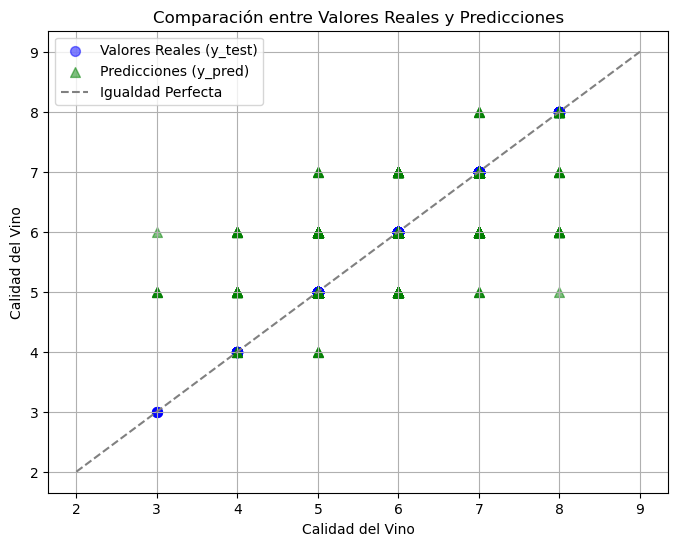

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_test, alpha=0.5, color='blue', label='Valores Reales (y_test)', marker='o', s=50)
plt.scatter(y_test, y_pred, alpha=0.5, color='green', label='Predicciones (y_pred)', marker='^', s=50)

plt.xlabel('Calidad del Vino')
plt.ylabel('Calidad del Vino')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.grid(True)
plt.legend()

plt.plot([2, 9], [2, 9], color='gray', linestyle='--', label='Igualdad Perfecta')
plt.legend()
plt.show()

_Conclusión_:
El gráfico que representa los valores reales (y_test) en azul (círculos) y las predicciones (y_pred) en verde (triángulos) proporciona una forma visual de comparar cómo se relacionan las predicciones del modelo con los valores reales.

- **Igualdad perfecta**: Los valores reales que caen exactamente en la línea diagonal (donde x=y) representan predicciones perfectas, lo que significa que el modelo predijo la calidad del vino de manera precisa.

- **Desviación positiva**: Los puntos verdes que están por encima de la línea diagonal indican que el modelo sobreestimó la calidad del vino en esas muestras.

- **Desviación negativa**: Los puntos verdes que están por debajo de la línea diagonal indican que el modelo subestimó la calidad del vino en esas muestras.

- **Distribución de errores**: La dispersión de puntos alrededor de la línea diagonal muestra cómo se distribuyen los errores del modelo. Una distribución estrecha y centrada en la línea diagonal indica predicciones precisas, mientras que una dispersión más amplia indica un mayor margen de error.


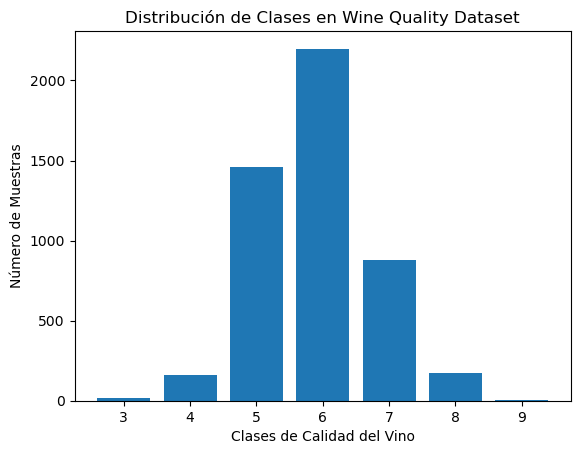

In [21]:
import matplotlib.pyplot as plt

y_classes, class_counts = np.unique(y, return_counts=True)

plt.bar(y_classes, class_counts)
plt.xlabel('Clases de Calidad del Vino')
plt.ylabel('Número de Muestras')
plt.title('Distribución de Clases en Wine Quality Dataset')
plt.xticks(y_classes)
plt.show()


In [22]:
y_classes, class_counts = np.unique(y, return_counts=True)

for y_class, count in zip(y_classes, class_counts):
    print(f'Clase {y_class}: {count} instancias')

Clase 3: 20 instancias
Clase 4: 163 instancias
Clase 5: 1457 instancias
Clase 6: 2198 instancias
Clase 7: 880 instancias
Clase 8: 175 instancias
Clase 9: 5 instancias


### **Resultados Preliminares del Modelo:**
- El modelo ha obtenido una precisión global del 69% en el conjunto de prueba, lo que significa que el 69% de las predicciones coincidieron con las etiquetas reales.
- El informe de clasificación proporciona métricas detalladas para cada clase de calidad del vino. Aquí se observan algunas tendencias notables:
    - El modelo tiene un alto recall (sensibilidad) para las clases de calidad "5" y "6", lo que indica que es bueno para identificar esas clases.
    - Sin embargo, el modelo tiene un bajo recall para las clases de calidad "3", "4", "7", "8" y "9", lo que sugiere que tiene dificultades para identificar estas clases.
    - El modelo tiene una alta precisión en las clases "3", "5", "7" y "8", lo que indica que las predicciones positivas para estas clases son en su mayoría correctas.
    - El modelo tiene una baja precisión en las clases "4" y "9", lo que sugiere que muchas de las predicciones positivas para estas clases son incorrectas.
- Las métricas F1-score y el promedio ponderado muestran el equilibrio entre precisión y recall en general, y el promedio ponderado tiene un valor del 68%, lo que refleja la eficacia general del modelo en el conjunto de datos desequilibrado.


### **_Conclusiones preliminares_** : 

1. **Clases Mayoritarias:** Debido al desequilibrio de clases, el modelo tiene una cantidad mucho mayor de ejemplos de las clases "5" y "6" en comparación con otras clases. Esto hace que el modelo tenga más información sobre estas clases, por lo que puede ser más preciso al predecirlas. Esto se refleja en los altos valores de precisión y recall para las clases "5" y "6".

2. **Clases Minoritarias:** Por otro lado, las clases minoritarias, como "3", "4", "7", "8" y "9", tienen menos ejemplos en el conjunto de datos. Esto hace que el modelo tenga menos información para aprender y predecir estas clases, lo que se traduce en valores más bajos de precisión y recall para estas clases.

3. **Impacto en el Promedio Ponderado:** El promedio ponderado de todas las métricas se ve influenciado por el desequilibrio de clases. Dado que las clases "5" y "6" tienen muchas más muestras que las clases minoritarias, su impacto es mayor en el promedio ponderado. Esto significa que el rendimiento del modelo en las clases minoritarias puede no reflejarse tan claramente en el promedio ponderado.

4. **Contexto del Problema:** En algunos casos, el desequilibrio de clases puede ser natural en un problema de clasificación. Por ejemplo, en el caso del vino, es más común encontrar vinos de calidad "5" y "6" que de calidad "3" o "9".


### Estrategias para mejora el modelo:

- Dado el desequilibrio de clases, podrías considerar estrategias de manejo de desequilibrio, como oversampling o undersampling de clases minoritarias, para mejorar el rendimiento del modelo en las clases desequilibradas.
- La ingeniería de características y la búsqueda de hiperparámetros podrían ayudar a mejorar aún más el rendimiento del modelo.
- Podrías evaluar otros modelos de clasificación y ajustar sus hiperparámetros para determinar si hay un modelo más adecuado para este conjunto de datos específico.
- Un análisis de residuos podría ayudarte a entender mejor las predicciones erróneas del modelo y cómo se pueden abordar.

La estrategia más útil sería el oversampling de las clases minoritarias. Dado que las clases "3", "4", "7", "8" y "9" tienen menos instancias que las clases mayoritarias, aumentar el número de muestras en estas clases puede ayudar al modelo a aprender de manera más equitativa y mejorar su rendimiento en las clases desequilibradas.

In [23]:
from imblearn.over_sampling import RandomOverSampler

# instancia del resampler
oversampler = RandomOverSampler(random_state=42)

# Aplica el resampling 
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)



In [24]:
X_train_balanced, X_test, y_train_balanced, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

y_pred_balanced = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_balanced)
print(f'Precisión en el conjunto de prueba: {accuracy:.2f}')

report = classification_report(y_test, y_pred_balanced)
print('Informe de Clasificación:')
print(report)


Precisión en el conjunto de prueba: 0.92
Informe de Clasificación:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       363
           4       0.99      1.00      1.00       338
           5       0.78      0.88      0.83       346
           6       0.81      0.66      0.73       375
           7       0.89      0.94      0.91       383
           8       0.99      1.00      1.00       332
           9       0.99      1.00      1.00       336

    accuracy                           0.92      2473
   macro avg       0.92      0.93      0.92      2473
weighted avg       0.92      0.92      0.92      2473



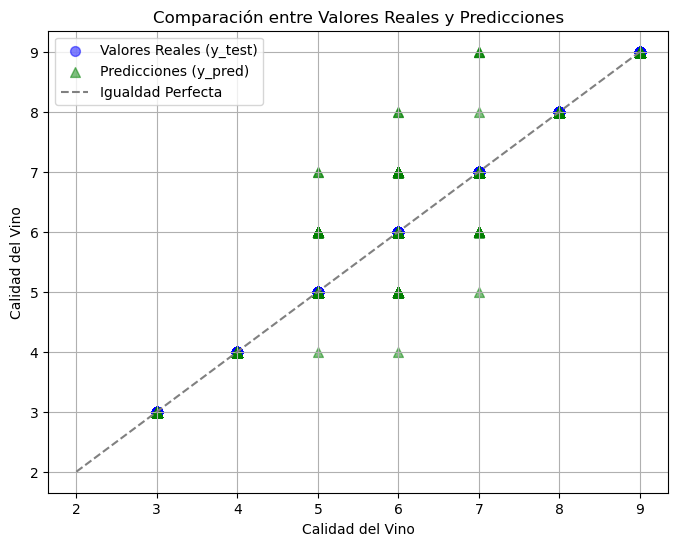

In [25]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_test, alpha=0.5, color='blue', label='Valores Reales (y_test)', marker='o', s=50)
plt.scatter(y_test, y_pred_balanced, alpha=0.5, color='green', label='Predicciones (y_pred)', marker='^', s=50)

plt.xlabel('Calidad del Vino')
plt.ylabel('Calidad del Vino')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.grid(True)
plt.legend()

plt.plot([2, 9], [2, 9], color='gray', linestyle='--', label='Igualdad Perfecta')
plt.legend()
plt.show()

## **Discución**

En este estudio, se exploraron modelos de clasificación, incluyendo Árboles de Decisión, Random Forest, SVM y K-NN, aplicados al conjunto de datos de calidad de vino blanco de Wine Quality UCI. Los resultados revelaron que el desbalance de clases en el conjunto de datos impactó significativamente en la precisión de los modelos, con las clases mayoritarias teniendo un mejor rendimiento. La estrategia de oversampling se utilizó para abordar este desbalance, resultando en una mejora sustancial de la precisión del modelo Random Forest de 0.69 a 0.92 en el conjunto de prueba. Se seleccionaron estos modelos específicos debido a su capacidad para manejar datos multidimensionales y su disponibilidad en bibliotecas de aprendizaje automático comunes. Las diferencias metodológicas entre el enfoque propuesto y el estudio de referencia radican en las estrategias de preprocesamiento y la evaluación de modelos. Si bien ambos utilizan algoritmos similares, los enfoques metodológicos y los resultados varían debido a las estrategias adaptadas a las necesidades de cada estudio. Esta investigación destaca la importancia de abordar el desbalance de clases en conjuntos de datos y adaptar la metodología a las características específicas del problema de clasificación.
